<a href="https://colab.research.google.com/github/Gorli-Jahanavi/classify_digits/blob/main/classifydigits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy (Noisy vs Unnoisy): 1.00


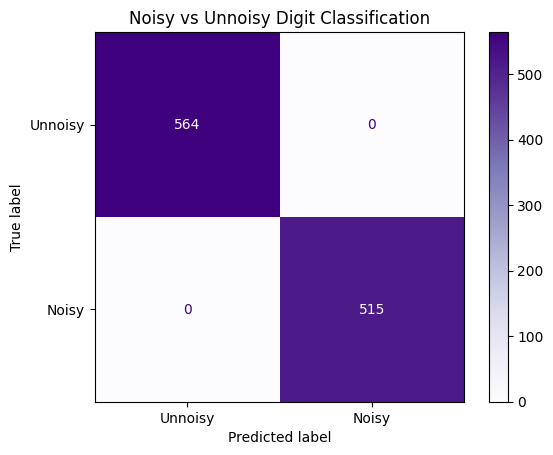

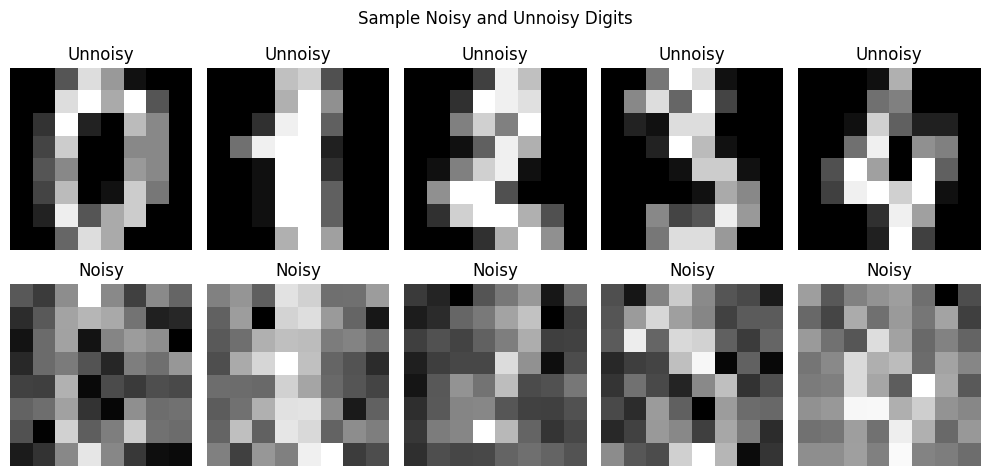

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load dataset
digits = load_digits()
X_original = digits.data
y_original = np.zeros(len(X_original))  # 0 = unnoisy

# Step 2: Add artificial noise to half of the dataset
np.random.seed(42)
noise_factor = 5.0
X_noisy = X_original + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_original.shape)
y_noisy = np.ones(len(X_noisy))  # 1 = noisy

# Step 3: Combine original and noisy data
X_combined = np.vstack((X_original, X_noisy))
y_combined = np.concatenate((y_original, y_noisy))

# Step 4: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.3, random_state=42)

# Step 5: Train classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Step 6: Predict & evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (Noisy vs Unnoisy): {accuracy:.2f}")

# Step 7: Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["Unnoisy", "Noisy"], cmap="Purples")
plt.title("Noisy vs Unnoisy Digit Classification")
plt.grid(False)
plt.show()

# Step 8: Visualize examples
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
fig.suptitle("Sample Noisy and Unnoisy Digits")
for i, ax in enumerate(axes.flat):
    if i < 5:
        ax.imshow(X_original[i].reshape(8, 8), cmap="gray")
        ax.set_title("Unnoisy")
    else:
        ax.imshow(X_noisy[i - 5].reshape(8, 8), cmap="gray")
        ax.set_title("Noisy")
    ax.axis("off")
plt.tight_layout()
plt.show()
